In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('All libraries imported')

All libraries imported


In [2]:
# load the data
data = pd.read_csv('loan_data.csv')

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.shape

(9578, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

<Axes: xlabel='not.fully.paid'>

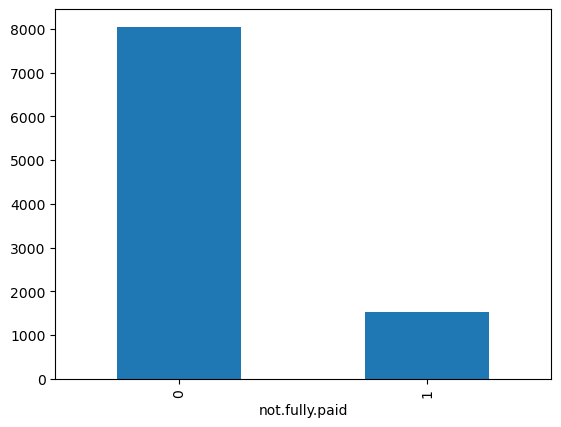

In [7]:
# EDA
data['not.fully.paid'].value_counts().plot(kind='bar')

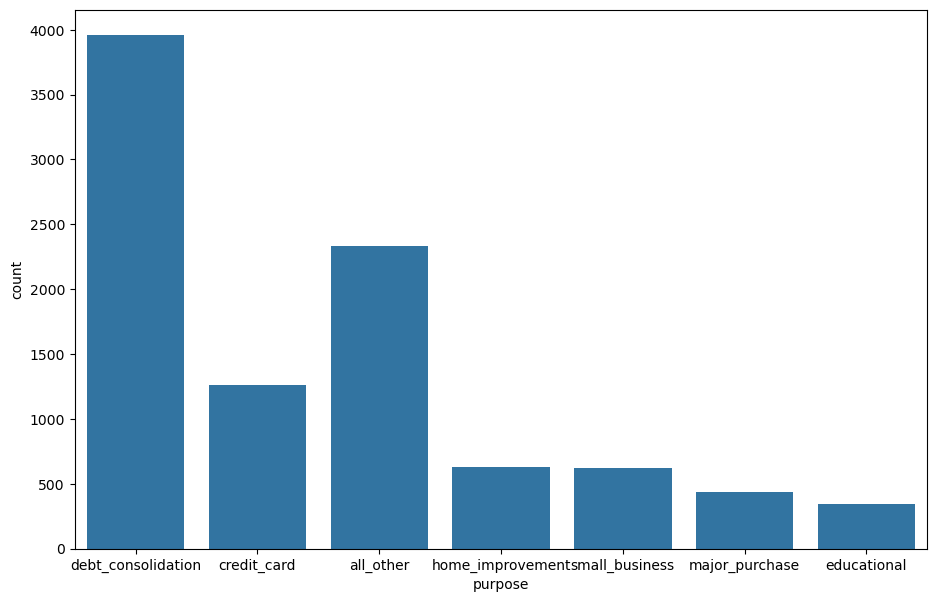

In [8]:
# purposes 
plt.figure(figsize=(11, 7))
sns.countplot(x=data['purpose'])
plt.show()

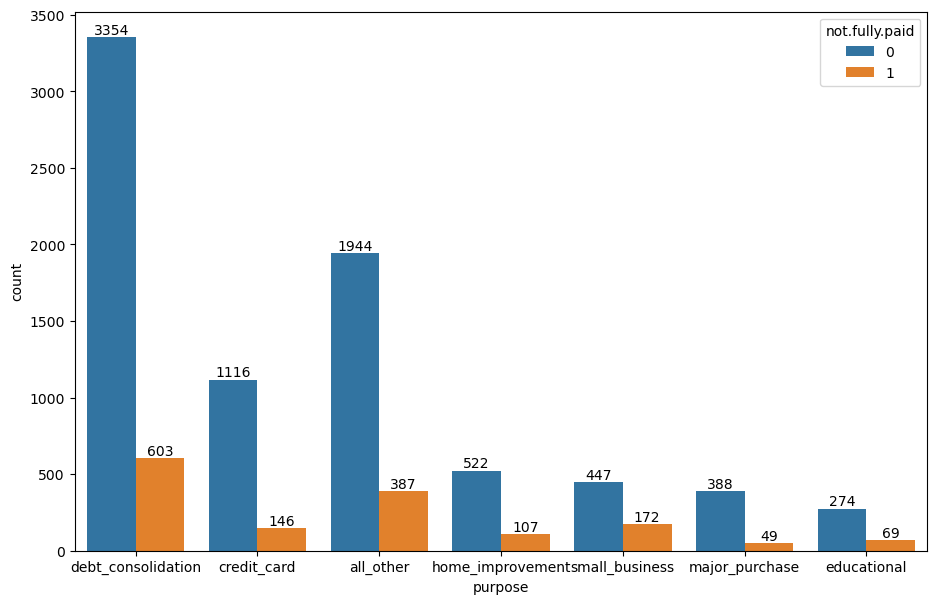

In [9]:
# purposes 
plt.figure(figsize=(11, 7))
ax = sns.countplot(x=data['purpose'], hue=data['not.fully.paid'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Handle Imbalance Data

In [10]:
not_fully_paid_0 = data[data['not.fully.paid'] == 0]
not_fully_paid_1 = data[data['not.fully.paid'] == 1]

In [11]:
not_fully_paid_0.shape

(8045, 14)

In [12]:
not_fully_paid_1.shape

(1533, 14)

In [13]:
# resample
from sklearn.utils import resample
minor_upsample = resample(not_fully_paid_1, replace=True, n_samples=8045)
new_df = pd.concat([not_fully_paid_0, minor_upsample])

# shuffle
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [14]:
new_df.shape

(16090, 14)

Transform categorical values into numerical values

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 4807 to 184
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  object 
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.8+ MB


In [16]:
# Apply label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
for i in new_df.columns:
    if new_df[i].dtypes == 'object':
        new_df[i] = le.fit_transform(new_df[i])

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 4807 to 184
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  int64  
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.8 MB


In [19]:
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
4807,1,2,0.1426,462.27,10.463103,22.11,687,3330.000000,18522,93.1,0,0,0,1
8077,0,0,0.1659,106.35,9.392662,17.10,632,1199.041667,7587,97.3,0,0,0,1
1036,1,1,0.1355,254.70,10.915088,21.51,672,3870.000000,17590,86.2,1,0,0,1
8321,0,6,0.1576,796.26,11.156251,29.21,732,8250.041667,57143,52.7,2,0,0,1
3955,1,0,0.1442,120.34,10.224411,14.67,672,5249.958333,10455,95.3,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,1,0,0.1287,336.34,11.350407,15.80,697,5010.041667,7241,44.7,2,0,0,0
5394,1,2,0.1635,538.77,10.915088,23.21,677,3660.000000,34715,96.7,1,0,0,0
837,1,1,0.1324,845.25,11.918391,7.84,697,5189.958333,31405,95.7,0,0,0,0
7386,1,0,0.0988,322.11,11.500691,14.32,722,7425.041667,31844,61.2,1,0,0,0


Reduce the number of features and will leave the most relevant features

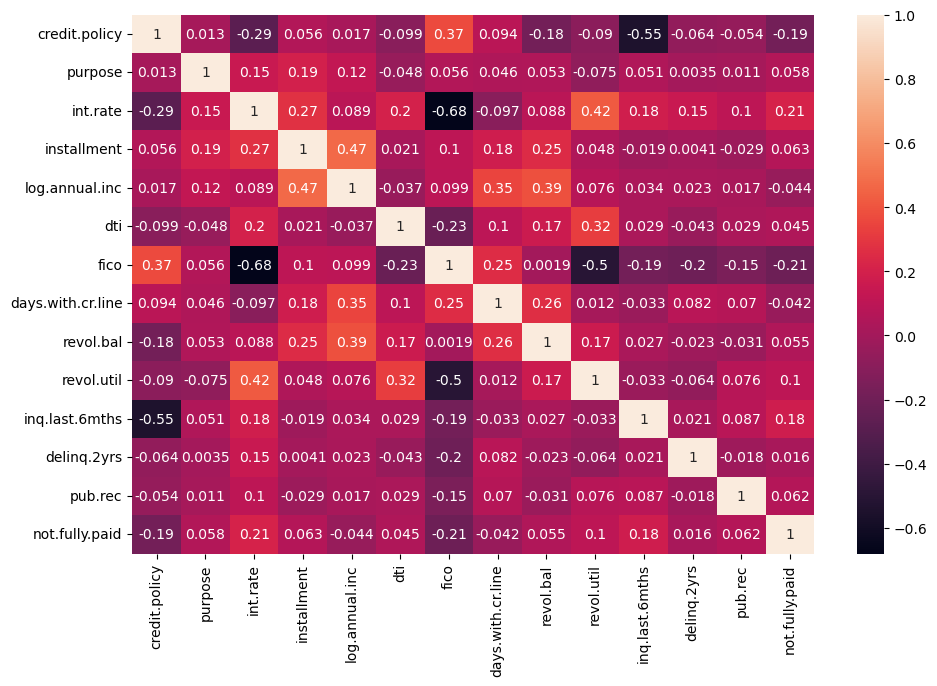

In [20]:
plt.figure(figsize=(11, 7))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [21]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.211487
fico                 0.207548
credit.policy        0.186458
inq.last.6mths       0.178350
revol.util           0.104547
installment          0.062963
pub.rec              0.062435
purpose              0.057869
revol.bal            0.054767
dti                  0.044944
log.annual.inc       0.044128
days.with.cr.line    0.041927
delinq.2yrs          0.016412
Name: not.fully.paid, dtype: float64

In [22]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [23]:
X=new_df[['credit.policy', 'purpose', 'int.rate', 
           'installment', 'fico', 'revol.bal', 
           'revol.util', 'inq.last.6mths', 'pub.rec']]

In [24]:
X.shape

(16090, 9)

In [25]:
y = new_df[['not.fully.paid']]

In [26]:
y.shape

(16090, 1)

In [27]:
# Create split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# apply standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# import library
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# BatchNormalization is equivalent of Standard Scaling
# Drop out - dropping out some neurons
# EarlyStopping - stopping training earlier before testing accuracy comes down
print('all libraries imported')

all libraries imported


In [30]:
# Create Architecture
model = Sequential()

model.add(keras.Input(shape=(9,)))

# Add first hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Add second hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Add third hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# output layer - 1 neuron due to binary classification
model.add(Dense(1, activation='sigmoid'))

2024-05-04 10:44:45.855766: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-04 10:44:45.855786: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-04 10:44:45.855792: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-04 10:44:45.855808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-04 10:44:45.855819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
model.summary()     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19)             │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667 (2.61 KB)

 Trainable params: 589 (2.30 KB)

 Non-trainable params: 78 (312.00 B)

In [32]:
#weight * input + bias
19 * 9 + 19

190

In [33]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('model is compiled')

model is compiled


In [34]:
# Early stopping 
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', verbose=1, patience=10)

In [35]:
X_train.shape

(12872, 9)

In [36]:
12872/256

50.28125

In [37]:
# run the model
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50


2024-05-04 10:44:47.040507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.5424 - loss: 0.7385 - val_accuracy: 0.5625 - val_loss: 0.6806
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5691 - loss: 0.6907 - val_accuracy: 0.6004 - val_loss: 0.6724
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5714 - loss: 0.6846 - val_accuracy: 0.6063 - val_loss: 0.6662
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5935 - loss: 0.6716 - val_accuracy: 0.6091 - val_loss: 0.6617
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5883 - loss: 0.6730 - val_accuracy: 0.6134 - val_loss: 0.6579
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6044 - loss: 0.6623 - val_accuracy: 0.6100 - val_loss: 0.6555
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6040 - loss: 0.6620 - val_accuracy: 0.6134 - val_loss: 0.6539
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5991 - loss: 0.6652 - val_accuracy: 0.6119 - val_loss: 

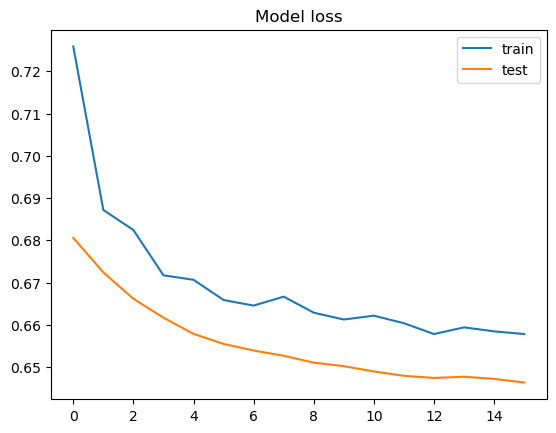

In [39]:
# plot the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.legend(['train', 'test'], loc='best')
plt.show()

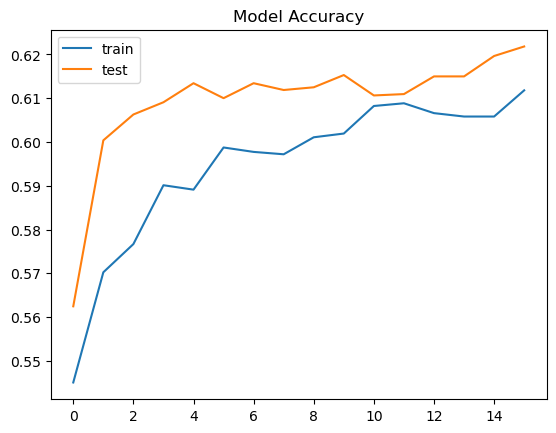

In [40]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [41]:
# evaluate the model
# test accuracy
model.evaluate(X_test, y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6103 - loss: 0.6543


[0.6463572382926941, 0.6218147873878479]

In [42]:
# train accuracy
model.evaluate(X_train, y_train)

403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6276 - loss: 0.6450


[0.6455299854278564, 0.6289620995521545]

In [44]:
# run the model without early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6083 - loss: 0.6571 - val_accuracy: 0.6200 - val_loss: 0.6460
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6231 - loss: 0.6526 - val_accuracy: 0.6206 - val_loss: 0.6458
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6081 - loss: 0.6562 - val_accuracy: 0.6193 - val_loss: 0.6454
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6099 - loss: 0.6529 - val_accuracy: 0.6187 - val_loss: 0.6456
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6189 - loss: 0.6519 - val_accuracy: 0.6175 - val_loss: 0.6456
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6103 - loss: 0.6566 - val_accuracy: 0.6153 - val_loss: 0.6451
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6169 - loss: 0.6522 - val_accuracy: 0.6162 - val_loss: 0.6446
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6138 - loss: 0.6546 - val_accuracy: 0.6203 - v

In [47]:
# test accuracy
score = model.evaluate(X_test, y_test)
print('model accuracy', score[1])
print('model loss', score[0])

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6215 - loss: 0.6432
model accuracy 0.6345556378364563
model loss 0.6364075541496277


In [48]:
# train accuracy
score = model.evaluate(X_train, y_train)
print('model accuracy', score[1])
print('model loss', score[0])

403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6365 - loss: 0.6331
model accuracy 0.636963963508606
model loss 0.6348593831062317


In [49]:
# prediction
pred = model.predict(X_test)
pred

101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


array([[0.38433063],
       [0.50475854],
       [0.60105366],
       ...,
       [0.4416765 ],
       [0.4345226 ],
       [0.6363652 ]], dtype=float32)

In [50]:
predict = (pred > 0.5).astype('int')
predict

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1579
           1       0.65      0.62      0.63      1639

    accuracy                           0.63      3218
   macro avg       0.63      0.63      0.63      3218
weighted avg       0.64      0.63      0.63      3218

